# **<font size=4 color=#BB3D00 face=微软雅黑>具有自相关的残值分析</font>**

## **<font size=3  face=微软雅黑>※Matlab案例</font>** 

网址：https://ww2.mathworks.cn/help/signal/ug/residual-analysis-with-autocorrelation.html     
描述：本案例由1个示例构成
### - <font color=DarkOrChid size=3>示例：如何使用自相关于置信区间分析残差的最小二乘拟合噪声数据</font>

## **<font size=3 face=微软雅黑>※Python案例</font>**

针对以上案例，采用Python语言实现。

### - <font color=DarkOrChid size=3>示例：如何使用自相关于置信区间分析残差的最小二乘拟合噪声数据</font>

残差是拟合模型与数据之间的差值。在信号+白噪声的模型当中，如果对信号有较好的拟合，残差应该是白噪声。

在加性高斯白噪声中创建一阶多项式（直线）所组成的噪声数据及。加性噪声是一个不相关的随机变量序列，遵循N(0,1)分布，这意味着所有随机变量的均值为0，方差为1，将随机数生成及设置为可重现结果的默认设置。

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import erfcinv
from scipy.fft import fft

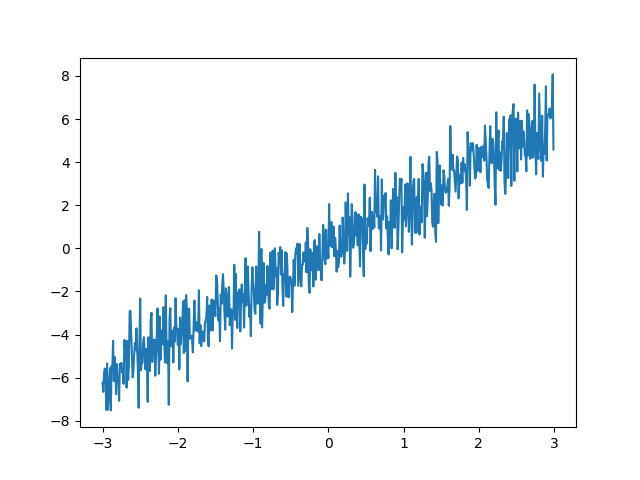

In [ ]:
x = np.arange(-3, 3, 0.01)
y = 2 * x + np.random.randn(len(x))
plt.plot(x, y)
plt.show()

使用函数找到噪声数据的最小二乘拟合线，用最小二乘法拟合原始数据。

In [ ]:
def linearRegression(x, y):
    length = len(x)
    mx = x.mean()
    a =  a = (y * (x - mx)).sum() / ((x ** 2).sum() - x.sum() ** 2 / length)
    b = (y - a * x).sum() / length
    return a, b

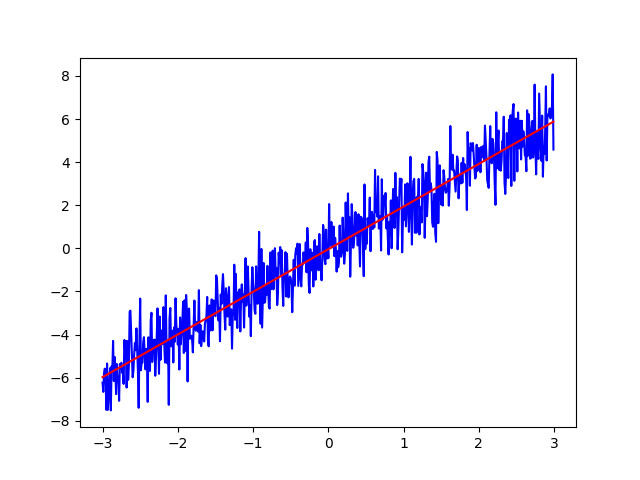

In [ ]:
a, b = linearRegression(x, y)
yfit = a * x + b

plt.plot(x, y, 'b')
plt.plot(x, yfit, 'r')
plt.show()

得到残差，求取滞后值为50的残差自相关序列。

In [ ]:
def autocorrelation(x, lags):
    n = len(x)
    x = np.array(x)
    result = [np.correlate(x[i:],x[:n-i])\
            /(x[i:].std()*x[:n-i].std()*(n-i)) for i in range(0, lags+1)]
    lag = np.arange(0, lags+1, 1)
    return result, lag

In [ ]:
residuals = y - yfit
xc,lags = autocorrelation(residuals, 50);

当检视自相关序列时，如何确认是否存在自相关关系。换言之，如何确定样本自相关序列是否是白噪声的自相关序列，如果残差的自相关序列看起来像是白噪声过程的自相关，确认所有的信号都符合拟合结果，最终表现在残差当中。在本例当中，使用99%的置信区间。为了构造置信区间，需要获取样本自相关值的分布。还需要在概率99%的适当分布中找到临界值，因为示例情况中的分布为高斯分布，可以使用互补逆误差函数。该函数与高斯累积分布函数的逆函数之间的关系可用函数erfcinv描述。

获取99%置信区间的临界值，使用临界值来构造置信上下限。

In [ ]:
conf99 = np.sqrt(2) * erfcinv(0.01)
lconf = -conf99 / np.sqrt(len(x))
hconf = conf99 / np.sqrt(len(x))
lline = lconf * np.ones(len(lags))
hline = hconf * np.ones(len(lags))

绘制自相关序列以及99%置信区间。  

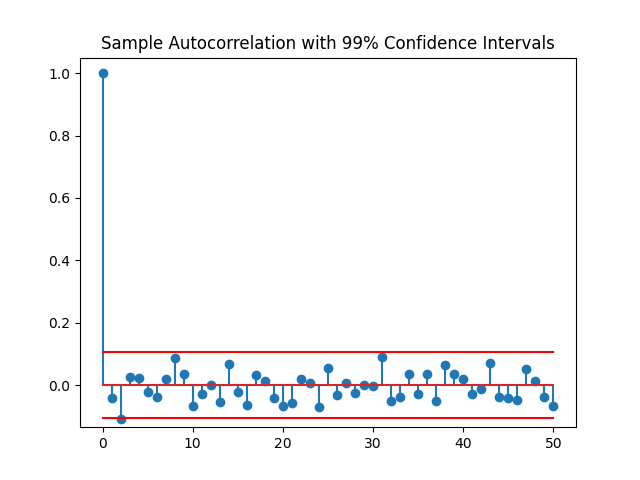

In [ ]:
plt.stem(lags, xc)
plt.ylim([lconf-0.03, 1.05])
plt.plot(lags, lline, 'r')
plt.plot(lags, hline, 'r')
plt.title('Sample Autocorrelation with 99% Confidence Intervals')
plt.show()

除零延时外，样本自相关值在白噪声序列自相关的99%置信范围内。由此可以得出结论，残差是白噪声。更具体地说，无法拒绝残差是一个白噪声过程的假设。

创建一个由正弦波和噪声组成的信号。数据采样频率为1 kHz。 正弦波的频率为100hz。 将随机数生成器设置为可重现结果的默认设置。

In [ ]:
fs = 1000
t = np.arange(0, 1-1/fs, 1/fs)
x = np.cos(2* np.pi * 100 * t) + np.random.randn(len(t))

使用离散傅里叶变换（DFT）获得100Hz的最小二乘拟合正弦波。复制的最小二乘估计为2/N乘以100Hz所对应的DFT系数，其中N为信号长度。实部是信号在余弦信号100Hz的振幅，虚部是正弦信号在100Hz处的振幅，最小二乘拟合是相应正确振幅的余弦与正弦信号之和。本例中，DFT的第101维对应100Hz

In [ ]:
xdft = fft(x)
ampest = 2 / len(x) * xdft[100]
xfit = ampest.real * np.cos(2 * np.pi * 100 * t) + ampest.imag * np.sin(2 * np.pi * 100 * t)

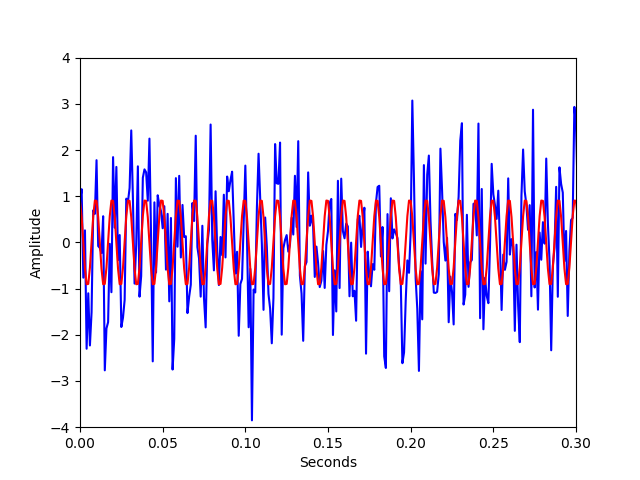

In [ ]:
plt.plot(t, x, 'b')
plt.plot(t, xfit, 'r')
plt.axis([0, 0.30, -4, 4])
plt.xlabel('Seconds')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
residuals = x - xfit
xc,lags = autocorrelation(residuals, 50);

In [ ]:
lconf = -conf99 / np.sqrt(len(x))
hconf = conf99 / np.sqrt(len(x))
lline = lconf * np.ones(len(lags))
hline = hconf * np.ones(len(lags))

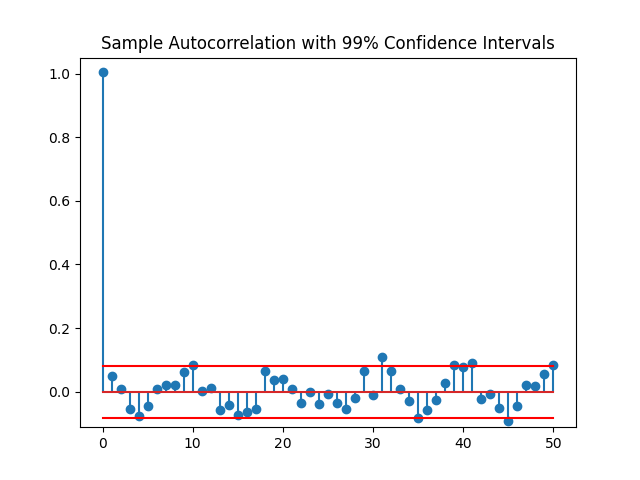

In [ ]:
plt.stem(lags, xc)
plt.ylim([lconf-0.03, 1.05])
plt.plot(lags, lline, 'r')
plt.plot(lags, hline, 'r')
plt.title('Sample Autocorrelation with 99% Confidence Intervals')
plt.show()

同样的可以看到，除了零延迟外，样本自相关值位于白噪声序列99%自相关的置信范围内。由此可以得到结论，残差为白噪声，无法拒绝残差是白噪声过程的实现的假设。

最后，我们加入一个频率为200Hz，振幅为3/4的正弦波，只拟合100Hz的正弦波，求残差的样本自相关。

In [ ]:
x = x + 3/4 * np.sin(2 * np.pi * 200 * t)
xdft = fft(x)
ampest = 2 / len(x) * xdft[100]
xfit = ampest.real * np.cos(2 * np.pi * 100 * t) + ampest.imag * np.sin(2 * np.pi * 100 * t)
residuals = x - xfit
xc,lags = autocorrelation(residuals, 50);

绘制样本自相关图及99%置信区间。

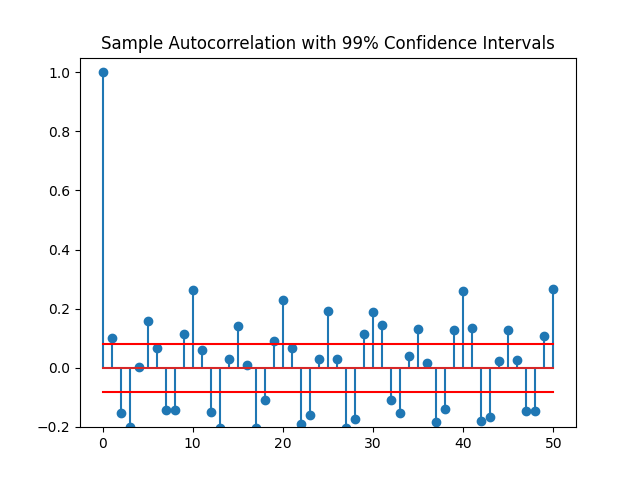

In [ ]:
plt.stem(lags, xc)
plt.ylim([lconf-0.12, 1.05])
plt.plot(lags, lline, 'r')
plt.plot(lags, hline, 'r')
plt.title('Sample Autocorrelation with 99% Confidence Intervals')
plt.show()

在这种情况下，自相关值在很多滞后点明显超过了99%的置信区间。这里可以拒绝残差是白噪声序列的假设。这意味着模型没有考虑到所有的信号，因此残差由信号加噪声组成。